In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [2]:
# prompt: code to upload file

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving SpamTextCSV.csv to SpamTextCSV.csv
User uploaded file "SpamTextCSV.csv" with length 509284 bytes


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('SpamTextCSV.csv') # Assuming the file is in your MyDrive
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
import numpy as np
#compute the length of majority & minority class
minority_len=len(df[df["Category"]=="spam"])
majority_len=len(df[df["Category"]=="ham"])

#store the indices of majority and minority class
minority_indices=df[df["Category"]=="spam"].index
majority_indices=df[df["Category"]=="ham"].index

#generate new majority indices from the total majority_indices
#with size equal to minority class length so we obtain equivalent number of indices length
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)
#concatenate the two indices to obtain indices of new dataframe
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])

# print(undersampled_indices)
#create df using new indices
data=df.loc[undersampled_indices]

#shuffle the sample
data=data.sample(frac=1)

#reset the index as its all mixed
data=data.reset_index()

#drop the older index
data=data.drop(
    columns=["index"],
)

data.shape
data["Category"].value_counts()

,count
Category,
spam,924
ham,924


In [5]:
data['spam'] = data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head()

,Category,Message,spam
0,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,1
1,ham,"Goodmorning,my grandfather expired..so am on l...",0
2,ham,Customer place i will call you,0
3,spam,What do U want for Xmas? How about 100 free te...,1
4,spam,Bored housewives! Chat n date now! 0871750.77....,1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.Message, data.spam, test_size=0.15, random_state = 42)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [9]:
message = "FRee Free Prize"


message_count = v.transform([message])
pred = model.predict(message_count)
print(pred[0])

1


In [10]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9568345323741008

In [11]:
def predict_spam(message, model, vectorizer):

  # Vectorize the message
  message_count = vectorizer.transform([message])  # Note: Input should be a list

  # Make the prediction
  prediction = model.predict(message_count)

  return prediction[0]

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       127
           1       0.97      0.95      0.96       151

    accuracy                           0.96       278
   macro avg       0.96      0.96      0.96       278
weighted avg       0.96      0.96      0.96       278

[[123   4]
 [  8 143]]


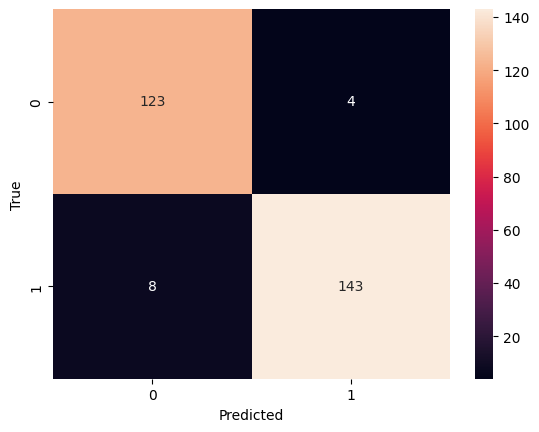

In [12]:
# prompt: show performance matrix

from sklearn.metrics import classification_report, confusion_matrix

# ... (Your existing code) ...

# Predict on the test set
y_pred = model.predict(X_test_count)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Optionally, visualize the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
